In [2]:
#idea: get bottom 10 and top 10, compare them on tSNE
!pip install wandb
import wandb
api = wandb.Api()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 KB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 KB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 KB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 KB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 KB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.4/164.4 KB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 KB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 KB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 KB 25.4 MB/s eta 0:00:00


In [31]:
!pip install pandas
!pip install scikit-learn matplotlib
import pandas as pd
import re
run = api.run("randomwish/odys-latent/5ruhh3mc")
data = []
for i, row in run.history(samples=1000).iterrows(): #1000 because thats the size of molecules test set
    data.append({
        "_timestamp":row["_timestamp"],
        "index": i,
        "file_name":re.search(r'([^/\\]+)(?=\.[^./\\]+$)', row["path"]).group(1),
        "kl-div": row["kl-div"],
        "true-latent": row["true-latent"]["values"],
        "predicted-latent": row["predicted-latent"]["values"]
    })
df = pd.DataFrame(data)
df.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 55.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.6 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 46.2 MB/s eta 0:00:0000:01:00:01


,_timestamp,index,file_name,kl-div,true-latent,predicted-latent
0,1.718205e+09,0,A-1000,77.495750,"[2, 2, 7, 24, 25, 33, 64, 113, 178, 268, 369, ...","[4, 2, 17, 21, 31, 28, 71, 131, 209, 271, 386,..."
1,1.718205e+09,1,A-1003,73.052185,"[2, 2, 7, 15, 21, 46, 44, 93, 174, 239, 339, 4...","[3, 0, 5, 27, 22, 33, 51, 105, 160, 246, 356, ..."
2,1.718205e+09,2,A-1024,127.872810,"[4, 1, 4, 15, 22, 31, 44, 82, 163, 236, 321, 4...","[4, 2, 9, 24, 28, 33, 68, 119, 196, 276, 382, ..."
3,1.718205e+09,3,A-1051,103.170036,"[5, 6, 18, 19, 30, 43, 86, 151, 226, 290, 426,...","[3, 3, 6, 15, 28, 31, 54, 108, 173, 244, 347, ..."
4,1.718205e+09,4,A-1122,149.536896,"[1, 2, 3, 11, 28, 23, 42, 59, 141, 238, 313, 4...","[3, 1, 6, 12, 23, 24, 58, 91, 147, 230, 334, 4..."


In [32]:
import os
import re

def extract_file_names(directory):
    file_names = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".png"):  # or any other relevant extension
                file_names.append(file)
    return [re.sub(r'\.png$', '', file) for file in file_names]

# 
good_samples_dir = "../outputs/OOD Samples MoleCules/Good Samples/images_gold"
bad_samples_dir = "../outputs/OOD Samples MoleCules/Bad Samples/images_gold"
good_file_names = extract_file_names(good_samples_dir)
bad_file_names = extract_file_names(bad_samples_dir)

In [43]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import numpy as np
PERPLEXITY = 350

df['goodness'] = df['file_name'].apply(
    lambda x: 2 if x in good_file_names else (0 if x in bad_file_names else 1)
)
tsne = TSNE(n_components=2, random_state=42,perplexity=PERPLEXITY,method="exact")
true_latent = np.array(df.loc[:]["true-latent"].tolist())
pred_latent = np.array(df.loc[:]["predicted-latent"].tolist())
latents = np.hstack((true_latent, pred_latent))
latent_tsne = tsne.fit_transform(latents)
color_map = {2: 'green', 0: 'red', 1: 'gray'}
colors = df['goodness'].map(color_map)

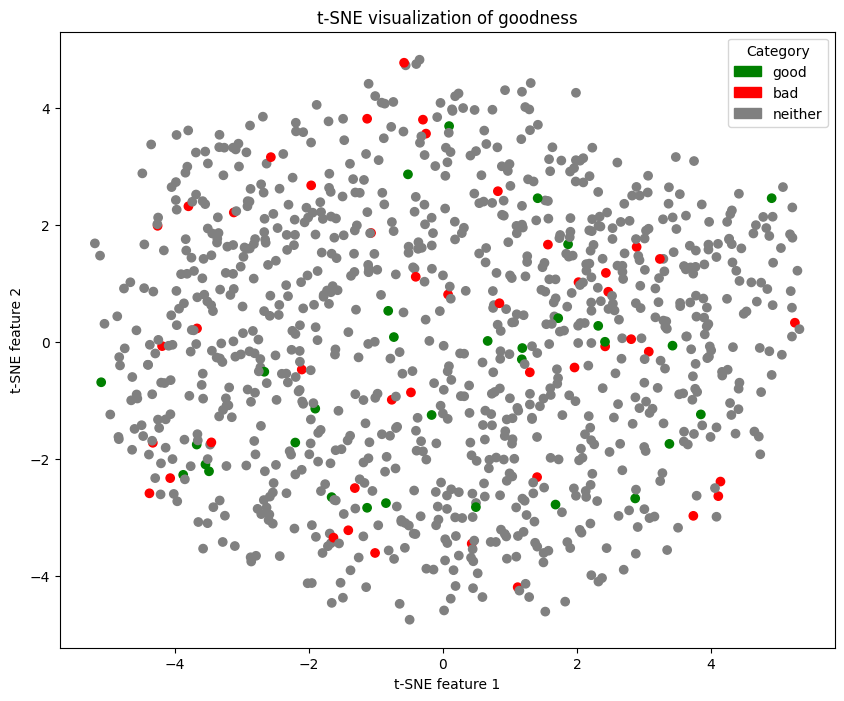

In [60]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10, 8))
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=colors)
plt.title('t-SNE visualization of goodness')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
legend_handles = [
    mpatches.Patch(color='green', label='good'),
    mpatches.Patch(color='red', label='bad'),
    mpatches.Patch(color='gray', label='neither')
]

# Add the legend
plt.legend(handles=legend_handles, title="Category")
plt.show()

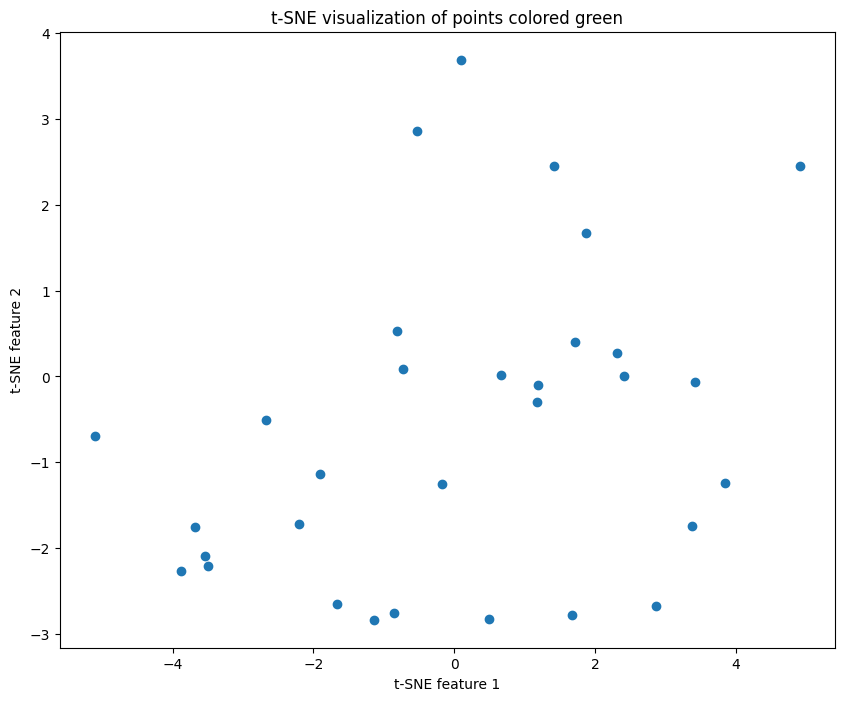

In [58]:
good_latents = np.where(df['goodness'] == 2)
filtered_good_latent_tsne = latent_tsne[filtered_indices]

# Plot only the filtered data points
plt.figure(figsize=(10, 8))
plt.scatter(filtered_good_latent_tsne[:, 0], filtered_good_latent_tsne[:, 1])
plt.title(f't-SNE visualization of points colored green')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

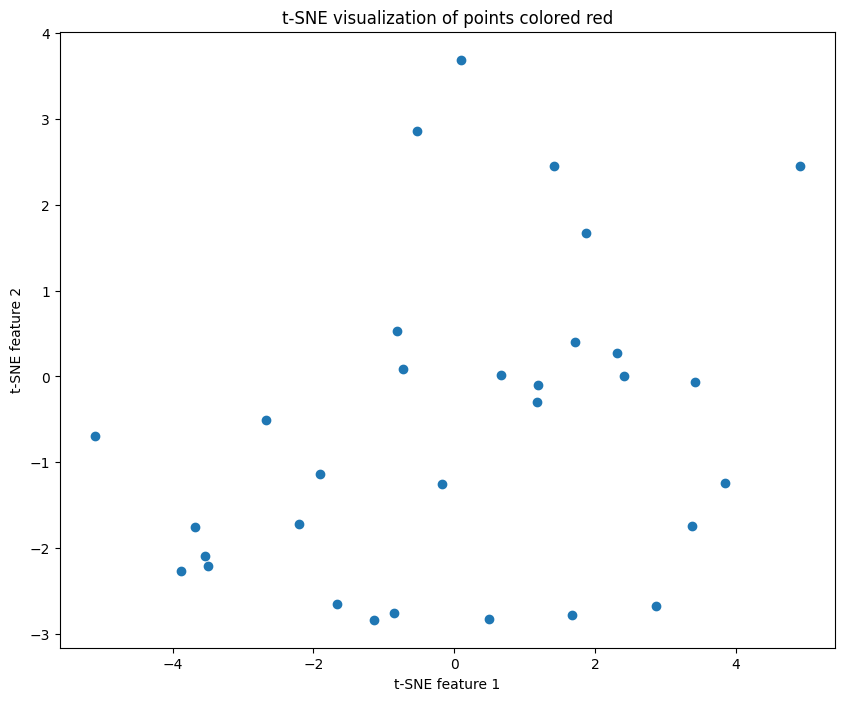

In [56]:
bad_latents = np.where(df['goodness'] == 2)
filtered_good_latent_tsne = latent_tsne[bad_latents]

# Plot only the filtered data points
plt.figure(figsize=(10, 8))
plt.scatter(filtered_good_latent_tsne[:, 0], filtered_good_latent_tsne[:, 1])
plt.title(f't-SNE visualization of points colored red')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

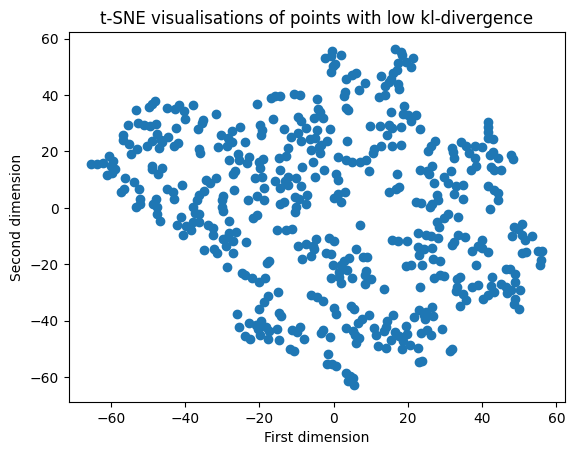

In [208]:
df_sorted = df.sort_values(by="kl-div")
SIZE = 500
PERPLEXITY = min(350,SIZE - 1)
top_ten = df_sorted.head(SIZE)
bottom_ten = df_sorted.tail(SIZE)

import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
top_true_latent = np.array(top_ten.loc[:]["true-latent"].tolist())
top_pred_latent = np.array(top_ten.loc[:]["predicted-latent"].tolist())
top_latents = np.hstack((top_true_latent, top_pred_latent))
tsne = TSNE(n_components=2, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(top_latents)
top_ten_2d = top_ten.copy()
top_ten_2d["2d-latent-first"] = latent_tsne[:,0]
top_ten_2d["2d-latent-second"] = latent_tsne[:,1]
plt.scatter(top_ten_2d["2d-latent-first"], top_ten_2d["2d-latent-second"])
plt.title("t-SNE visualisations of points with low kl-divergence")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()


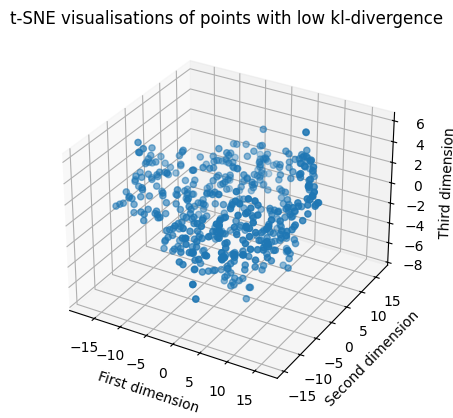

In [209]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
top_true_latent = np.array(top_ten.loc[:]["true-latent"].tolist())
top_pred_latent = np.array(top_ten.loc[:]["predicted-latent"].tolist())
top_latents = np.hstack((top_true_latent, top_pred_latent))
tsne = TSNE(n_components=3, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(top_latents)
top_ten_3d = top_ten.copy()
top_ten_3d["3d-latent-first"] = latent_tsne[:,0]
top_ten_3d["3d-latent-second"] = latent_tsne[:,1]
top_ten_3d["3d-latent-third"] = latent_tsne[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(top_ten_3d["3d-latent-first"],top_ten_3d["3d-latent-second"],top_ten_3d["3d-latent-third"])
plt.title("t-SNE visualisations of points with low kl-divergence")
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_zlabel("Third dimension")
plt.show()

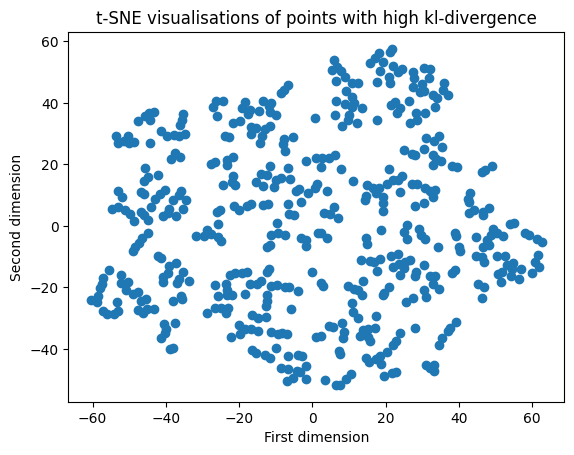

In [210]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
bot_true_latent = np.array(bottom_ten.loc[:]["true-latent"].tolist())
bot_pred_latent = np.array(bottom_ten.loc[:]["predicted-latent"].tolist())
bot_latents = np.hstack((bot_true_latent, bot_pred_latent))
tsne = TSNE(n_components=2, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(bot_latents)
bot_ten_2d = top_ten.copy()
bot_ten_2d["2d-latent-first"] = latent_tsne[:,0]
bot_ten_2d["2d-latent-second"] = latent_tsne[:,1]
plt.scatter(bot_ten_2d["2d-latent-first"], bot_ten_2d["2d-latent-second"])
plt.title("t-SNE visualisations of points with high kl-divergence")
plt.xlabel("First dimension")
plt.ylabel("Second dimension")
plt.show()



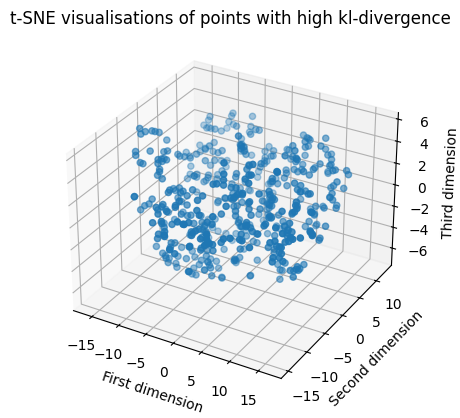

In [211]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
bot_true_latent = np.array(bottom_ten.loc[:]["true-latent"].tolist())
bot_pred_latent = np.array(bottom_ten.loc[:]["predicted-latent"].tolist())
bot_latents = np.hstack((bot_true_latent, bot_pred_latent))
tsne = TSNE(n_components=3, random_state=42,perplexity=PERPLEXITY,method="exact")
latent_tsne = tsne.fit_transform(bot_latents)
bot_ten_3d = bottom_ten.copy()
bot_ten_3d["3d-latent-first"] = latent_tsne[:,0]
bot_ten_3d["3d-latent-second"] = latent_tsne[:,1]
bot_ten_3d["3d-latent-third"] = latent_tsne[:,2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(bot_ten_3d["3d-latent-first"],bot_ten_3d["3d-latent-second"],bot_ten_3d["3d-latent-third"])
plt.title("t-SNE visualisations of points with high kl-divergence")
ax.set_xlabel("First dimension")
ax.set_ylabel("Second dimension")
ax.set_zlabel("Third dimension")
plt.show()